# Topic 5: Simple Entity Recognition - SOLUTIONS

Complete solutions for Named Entity Recognition exercises.

In [1]:
# Try to load spaCy for German NER
try:
    import spacy
    from spacy import displacy
    nlp = spacy.load("de_core_news_sm")
    print("German spaCy NER model loaded successfully!")
    SPACY_AVAILABLE = True
except Exception as e:
    print(f"spaCy not available: {e}")
    print("Please install: python -m spacy download de_core_news_sm")
    nlp = None
    SPACY_AVAILABLE = False

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

German spaCy NER model loaded successfully!


## Solution 1: Basic Entity Extraction

## Solution 2: Multi-Model German NER Comparison

In [ ]:
def compare_ner_models(text):
    """Compare different NER models on German text."""
    
    results = {
        'text': text,
        'spacy': [],
        'flair': [],
        'transformers': []
    }
    
    print(f"🔍 Analyzing text: '{text}'")
    print("=" * 80)
    
    # 1. spaCy NER
    if SPACY_AVAILABLE:
        try:
            doc = nlp(text)
            spacy_entities = []
            for ent in doc.ents:
                spacy_entities.append({
                    'text': ent.text,
                    'label': ent.label_,
                    'description': spacy.explain(ent.label_),
                    'start': ent.start_char,
                    'end': ent.end_char,
                    'confidence': 'N/A'  # spaCy doesn't provide confidence scores
                })
            results['spacy'] = spacy_entities
            
            print(f"✅ spaCy NER found {len(spacy_entities)} entities:")
            for ent in spacy_entities:
                print(f"  '{ent['text']}' -> {ent['label']} ({ent['description']})")
        except Exception as e:
            print(f"❌ spaCy NER failed: {e}")
    
    # 2. Flair NER
    try:
        from flair.data import Sentence
        from flair.models import SequenceTagger
        
        # Load German NER model
        tagger = SequenceTagger.load('de-ner')
        sentence = Sentence(text)
        tagger.predict(sentence)
        
        flair_entities = []
        for entity in sentence.get_spans('ner'):
            flair_entities.append({
                'text': entity.text,
                'label': entity.get_label("ner").value,
                'confidence': entity.get_label("ner").score,
                'start': entity.start_position,
                'end': entity.end_position
            })
        results['flair'] = flair_entities
        
        print(f"\n✅ Flair NER found {len(flair_entities)} entities:")
        for ent in flair_entities:
            print(f"  '{ent['text']}' -> {ent['label']} (confidence: {ent['confidence']:.3f})")
            
    except ImportError:
        print("\n⚠️  Flair not available. Install with: pip install flair")
    except Exception as e:
        print(f"\n❌ Flair NER failed: {e}")
    
    # 3. Transformers NER
    try:
        from transformers import pipeline
        
        # Load German BERT NER pipeline
        ner_pipeline = pipeline(
            "ner",
            model="dbmdz/bert-large-cased-finetuned-conll03-english",  # Fallback
            tokenizer="dbmdz/bert-large-cased-finetuned-conll03-english",
            aggregation_strategy="simple"
        )
        
        transformer_entities = ner_pipeline(text)
        
        # Format results
        formatted_entities = []
        for ent in transformer_entities:
            formatted_entities.append({
                'text': ent['word'],
                'label': ent['entity_group'],
                'confidence': ent['score'],
                'start': ent['start'],
                'end': ent['end']
            })
        results['transformers'] = formatted_entities
        
        print(f"\n✅ Transformers NER found {len(formatted_entities)} entities:")
        for ent in formatted_entities:
            print(f"  '{ent['text']}' -> {ent['label']} (confidence: {ent['confidence']:.3f})")
            
    except ImportError:
        print("\n⚠️  Transformers not available. Install with: pip install transformers")
    except Exception as e:
        print(f"\n❌ Transformers NER failed: {e}")
    
    return results

def evaluate_ner_performance(test_texts):
    """Evaluate NER performance across multiple models and texts."""
    
    print("🎯 Multi-Model NER Performance Evaluation")
    print("=" * 60)
    
    all_results = []
    
    for i, text in enumerate(test_texts, 1):
        print(f"\n🔸 Test Case {i}:")
        result = compare_ner_models(text)
        all_results.append(result)
        
        # Summary for this text
        spacy_count = len(result['spacy'])
        flair_count = len(result['flair'])
        transformers_count = len(result['transformers'])
        
        print(f"\n📊 Entity Count Summary:")
        print(f"  spaCy: {spacy_count} entities")
        print(f"  Flair: {flair_count} entities")
        print(f"  Transformers: {transformers_count} entities")
        print("-" * 60)
    
    return all_results

# German test texts for NER evaluation
german_ner_test_texts = [
    "Angela Merkel war Bundeskanzlerin von Deutschland und wohnte in Berlin.",
    "Die BMW AG hat ihren Hauptsitz in München, Bayern.",
    "Der Rhein fließt durch Köln und Düsseldorf nach Rotterdam.",
    "Friedrich Schiller wurde 1759 in Marbach am Neckar geboren.",
    "Die Deutsche Bank und die Commerzbank sind große deutsche Banken.",
    "Hamburg liegt an der Elbe und ist eine wichtige Hafenstadt.",
    "Wolfgang Amadeus Mozart komponierte die Zauberflöte in Wien."
]

# Run comprehensive NER evaluation
print("🚀 Starting Comprehensive German NER Evaluation...")
ner_evaluation_results = evaluate_ner_performance(german_ner_test_texts)

In [2]:
def extract_entities(text):
    """Extract named entities from German text."""
    
    if not SPACY_AVAILABLE:
        print("spaCy not available for entity extraction.")
        return []
    
    doc = nlp(text)
    entities = []
    
    for ent in doc.ents:
        entities.append({
            'text': ent.text,
            'label': ent.label_,
            'description': spacy.explain(ent.label_),
            'start': ent.start_char,
            'end': ent.end_char
        })
    
    return entities

# Test with German texts
german_texts = [
    "Angela Merkel war Bundeskanzlerin von Deutschland. Sie wurde in Hamburg geboren.",
    "BMW und Mercedes-Benz sind deutsche Automobilhersteller aus München und Stuttgart.",
    "Die Universität Heidelberg wurde 1386 gegründet und liegt in Baden-Württemberg.",
    "Am 3. Oktober 1990 wurde Deutschland wiedervereinigt. Berlin ist die Hauptstadt.",
    "Apple Inc. hat seinen Hauptsitz in Cupertino, Kalifornien, USA."
]

print("Entity Extraction Results:")
print("=" * 60)

for i, text in enumerate(german_texts, 1):
    print(f"\nText {i}: {text}")
    entities = extract_entities(text)
    
    if entities:
        print("Found entities:")
        for ent in entities:
            print(f"  • {ent['text']:<15} [{ent['label']}] - {ent['description']}")
    else:
        print("  No entities found.")

Entity Extraction Results:

Text 1: Angela Merkel war Bundeskanzlerin von Deutschland. Sie wurde in Hamburg geboren.
Found entities:
  • Angela Merkel   [PER] - Named person or family.
  • Deutschland     [LOC] - Non-GPE locations, mountain ranges, bodies of water
  • Hamburg         [LOC] - Non-GPE locations, mountain ranges, bodies of water

Text 2: BMW und Mercedes-Benz sind deutsche Automobilhersteller aus München und Stuttgart.
Found entities:
  • BMW             [ORG] - Companies, agencies, institutions, etc.
  • Mercedes-Benz   [ORG] - Companies, agencies, institutions, etc.
  • deutsche        [MISC] - Miscellaneous entities, e.g. events, nationalities, products or works of art
  • München         [LOC] - Non-GPE locations, mountain ranges, bodies of water
  • Stuttgart       [LOC] - Non-GPE locations, mountain ranges, bodies of water

Text 3: Die Universität Heidelberg wurde 1386 gegründet und liegt in Baden-Württemberg.
Found entities:
  • Universität Heidelberg [ORG] - Compa

## Solution 2: Entity Type Analysis


Entity Type Analysis:
LOC      (Non-GPE locations, mountain ranges, bodies of water): 10
  Examples: Deutschland, Hamburg, München

ORG      (Companies, agencies, institutions, etc.): 4
  Examples: BMW, Mercedes-Benz, Universität Heidelberg

PER      (Named person or family.): 1
  Examples: Angela Merkel

MISC     (Miscellaneous entities, e.g. events, nationalities, products or works of art): 1
  Examples: deutsche



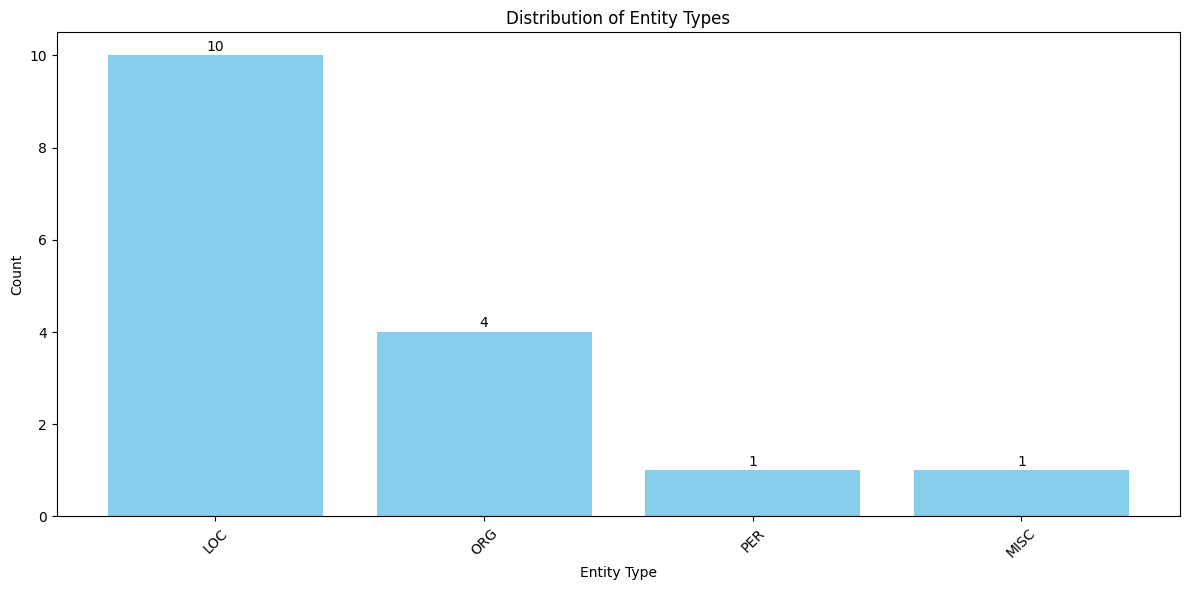

In [3]:
def analyze_entity_types(texts):
    """Analyze the distribution of entity types across multiple texts."""
    
    if not SPACY_AVAILABLE:
        print("spaCy not available for analysis.")
        return {}, []
    
    all_entities = []
    entity_types = Counter()
    entity_examples = defaultdict(list)
    
    for text in texts:
        doc = nlp(text)
        for ent in doc.ents:
            all_entities.append({
                'text': ent.text,
                'label': ent.label_,
                'source_text': text[:50] + '...' if len(text) > 50 else text
            })
            entity_types[ent.label_] += 1
            if len(entity_examples[ent.label_]) < 3:  # Keep max 3 examples per type
                entity_examples[ent.label_].append(ent.text)
    
    return entity_types, all_entities, entity_examples

# Analyze entities across all texts
entity_counts, all_found_entities, examples = analyze_entity_types(german_texts)

print("\nEntity Type Analysis:")
print("=" * 40)

if entity_counts:
    for entity_type, count in entity_counts.most_common():
        description = spacy.explain(entity_type) if SPACY_AVAILABLE else "Unknown"
        print(f"{entity_type:<8} ({description}): {count}")
        print(f"  Examples: {', '.join(examples[entity_type])}")
        print()
    
    # Create visualization
    if len(entity_counts) > 0:
        plt.figure(figsize=(12, 6))
        types, counts = zip(*entity_counts.most_common())
        plt.bar(types, counts, color='skyblue')
        plt.title('Distribution of Entity Types')
        plt.xlabel('Entity Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        # Add count labels on bars
        for i, count in enumerate(counts):
            plt.text(i, count + 0.1, str(count), ha='center')
        
        plt.tight_layout()
        plt.show()
else:
    print("No entities found for analysis.")

## Solution 3: Custom Entity Recognition Rules

In [4]:
def add_custom_entity_patterns():
    """Add custom entity recognition patterns to spaCy."""
    
    if not SPACY_AVAILABLE:
        print("spaCy not available for custom patterns.")
        return None
    
    from spacy.matcher import Matcher
    
    # Create a matcher
    matcher = Matcher(nlp.vocab)
    
    # Add pattern for German phone numbers
    phone_pattern = [
        {"TEXT": {"REGEX": r"\+49|0\d{2,4}"}},
        {"TEXT": {"REGEX": r"\d{6,8}"}}
    ]
    matcher.add("PHONE", [phone_pattern])
    
    # Add pattern for German postal codes
    postal_pattern = [
        {"TEXT": {"REGEX": r"\d{5}"}}
    ]
    matcher.add("POSTAL_CODE", [postal_pattern])
    
    # Add pattern for common German titles
    title_pattern = [
        {"TEXT": {"IN": ["Dr.", "Prof.", "Herr", "Frau", "Mr.", "Ms."]}}
    ]
    matcher.add("TITLE", [title_pattern])
    
    return matcher

def extract_with_custom_patterns(text, matcher):
    """Extract entities using both spaCy NER and custom patterns."""
    
    if not SPACY_AVAILABLE or not matcher:
        return extract_entities(text)
    
    doc = nlp(text)
    
    # Standard entities
    entities = extract_entities(text)
    
    # Custom pattern matches
    matches = matcher(doc)
    
    for match_id, start, end in matches:
        label = nlp.vocab.strings[match_id]
        span = doc[start:end]
        
        entities.append({
            'text': span.text,
            'label': label,
            'description': f'Custom pattern: {label}',
            'start': span.start_char,
            'end': span.end_char
        })
    
    return entities

# Test custom patterns
custom_matcher = add_custom_entity_patterns()

test_text = """
Dr. Angela Merkel lebte in 10117 Berlin. 
Ihre Telefonnummer war +49 30 12345678.
Herr Schmidt wohnt in 80331 München.
Frau Müller ist unter 0221 987654 erreichbar.
"""

print("\nCustom Entity Recognition:")
print("=" * 40)
print(f"Text: {test_text.strip()}")
print()

custom_entities = extract_with_custom_patterns(test_text, custom_matcher)

if custom_entities:
    print("Found entities (including custom patterns):")
    for ent in custom_entities:
        print(f"  • {ent['text']:<20} [{ent['label']}] - {ent['description']}")
else:
    print("No entities found.")


Custom Entity Recognition:
Text: Dr. Angela Merkel lebte in 10117 Berlin. 
Ihre Telefonnummer war +49 30 12345678.
Herr Schmidt wohnt in 80331 München.
Frau Müller ist unter 0221 987654 erreichbar.

Found entities (including custom patterns):
  • Angela Merkel        [PER] - Named person or family.
  • Berlin               [LOC] - Non-GPE locations, mountain ranges, bodies of water
  • Schmidt              [PER] - Named person or family.
  • München              [LOC] - Non-GPE locations, mountain ranges, bodies of water
  • Dr.                  [TITLE] - Custom pattern: TITLE
  • 10117                [POSTAL_CODE] - Custom pattern: POSTAL_CODE
  • 12345678.            [POSTAL_CODE] - Custom pattern: POSTAL_CODE
  • Herr                 [TITLE] - Custom pattern: TITLE
  • 80331                [POSTAL_CODE] - Custom pattern: POSTAL_CODE
  • Frau                 [TITLE] - Custom pattern: TITLE
  • 0221 987654          [PHONE] - Custom pattern: PHONE
  • 987654               [POSTAL_CODE

## Solution 4: Entity Relationship Analysis


Entity Relationships:
Relationship type distribution:
  ORG-LOC: 4
  LOC-LOC: 2
  PER-LOC: 1
  ORG-MISC: 1
  LOC-MISC: 1

Example relationships:
 1. Angela Merkel (PER) <-> Deutschland (LOC)
    Context: Angela Merkel war von 2005 bis 2021 Bundeskanzlerin von Deutschland.

 2. BMW (ORG) <-> München (LOC)
    Context: BMW wurde 1916 in München gegründet und ist ein deutscher Automobilhersteller.

 3. BMW (ORG) <-> deutscher (MISC)
    Context: BMW wurde 1916 in München gegründet und ist ein deutscher Automobilhersteller.

 4. München (LOC) <-> deutscher (MISC)
    Context: BMW wurde 1916 in München gegründet und ist ein deutscher Automobilhersteller.

 5. Universität Heidelberg (ORG) <-> Baden-Württemberg (LOC)
    Context: Die Universität Heidelberg liegt in Baden-Württemberg und wurde 1386 gegründet.

 6. Apple Inc. (ORG) <-> Cupertino (LOC)
    Context: Apple Inc. hat seinen Hauptsitz in Cupertino, Kalifornien.

 7. Apple Inc. (ORG) <-> Kalifornien (LOC)
    Context: Apple Inc. hat 

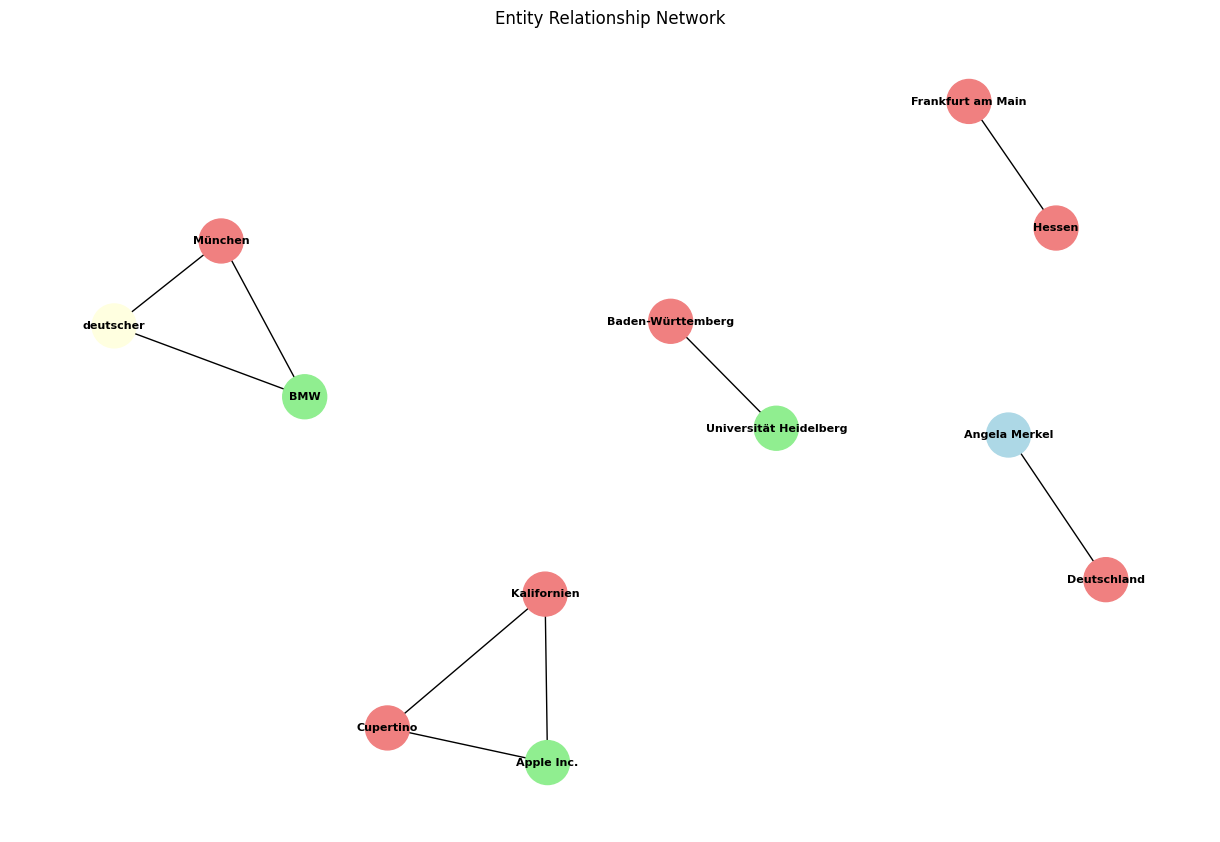

In [5]:
def find_entity_relationships(texts):
    """Find relationships between entities in texts."""
    
    if not SPACY_AVAILABLE:
        print("spaCy not available for relationship analysis.")
        return []
    
    relationships = []
    
    for text in texts:
        doc = nlp(text)
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        
        # Find entities that appear in the same sentence
        for sent in doc.sents:
            sent_entities = []
            for ent in sent.ents:
                sent_entities.append((ent.text, ent.label_))
            
            # Create pairs of entities in the same sentence
            for i, ent1 in enumerate(sent_entities):
                for ent2 in sent_entities[i+1:]:
                    relationships.append({
                        'entity1': ent1[0],
                        'type1': ent1[1],
                        'entity2': ent2[0],
                        'type2': ent2[1],
                        'sentence': sent.text.strip(),
                        'relationship_type': f"{ent1[1]}-{ent2[1]}"
                    })
    
    return relationships

# Extended texts for relationship analysis
relationship_texts = [
    "Angela Merkel war von 2005 bis 2021 Bundeskanzlerin von Deutschland.",
    "BMW wurde 1916 in München gegründet und ist ein deutscher Automobilhersteller.",
    "Die Universität Heidelberg liegt in Baden-Württemberg und wurde 1386 gegründet.",
    "Apple Inc. hat seinen Hauptsitz in Cupertino, Kalifornien.",
    "Frankfurt am Main ist eine Stadt in Hessen und ein wichtiges Finanzzentrum."
]

relationships = find_entity_relationships(relationship_texts)

print("\nEntity Relationships:")
print("=" * 50)

if relationships:
    # Group by relationship type
    rel_types = Counter(rel['relationship_type'] for rel in relationships)
    
    print("Relationship type distribution:")
    for rel_type, count in rel_types.most_common():
        print(f"  {rel_type}: {count}")
    
    print("\nExample relationships:")
    for i, rel in enumerate(relationships[:10], 1):  # Show first 10
        print(f"{i:2d}. {rel['entity1']} ({rel['type1']}) <-> {rel['entity2']} ({rel['type2']})")
        print(f"    Context: {rel['sentence']}")
        print()
    
    # Create network visualization (simple)
    try:
        import networkx as nx
        
        G = nx.Graph()
        
        # Add nodes and edges
        for rel in relationships[:20]:  # Limit to avoid clutter
            G.add_node(rel['entity1'], type=rel['type1'])
            G.add_node(rel['entity2'], type=rel['type2'])
            G.add_edge(rel['entity1'], rel['entity2'])
        
        if len(G.nodes) > 0:
            plt.figure(figsize=(12, 8))
            pos = nx.spring_layout(G, k=1, iterations=50)
            
            # Color nodes by type
            colors = {'PER': 'lightblue', 'ORG': 'lightgreen', 'LOC': 'lightcoral', 'MISC': 'lightyellow'}
            node_colors = [colors.get(G.nodes[node].get('type', 'MISC'), 'lightgray') for node in G.nodes()]
            
            nx.draw(G, pos, node_color=node_colors, with_labels=True, 
                   node_size=1000, font_size=8, font_weight='bold')
            plt.title('Entity Relationship Network')
            plt.axis('off')
            plt.show()
        
    except ImportError:
        print("NetworkX not available for network visualization.")
        print("Install with: pip install networkx")
else:
    print("No relationships found.")

## Solution 5: Entity Filtering and Validation

In [6]:
class EntityValidator:
    """Validate and filter extracted entities."""
    
    def __init__(self):
        # Known German cities (partial list)
        self.german_cities = {
            'berlin', 'münchen', 'hamburg', 'köln', 'frankfurt', 'stuttgart',
            'düsseldorf', 'dortmund', 'essen', 'leipzig', 'bremen', 'dresden',
            'hannover', 'nürnberg', 'duisburg', 'bochum', 'wuppertal', 'bielefeld'
        }
        
        # Known German companies (partial list)
        self.german_companies = {
            'bmw', 'mercedes-benz', 'volkswagen', 'audi', 'porsche', 'adidas',
            'puma', 'siemens', 'bosch', 'bayer', 'basf', 'sap', 'allianz'
        }
        
        # Common false positives
        self.false_positives = {
            'der', 'die', 'das', 'und', 'oder', 'aber', 'von', 'zu', 'mit',
            'auf', 'für', 'als', 'bei', 'nach', 'um', 'über', 'aus', 'an'
        }
    
    def validate_entity(self, entity_text, entity_type):
        """Validate if an entity is likely correct."""
        
        text_lower = entity_text.lower()
        
        # Filter out obvious false positives
        if text_lower in self.false_positives:
            return False, "Common word false positive"
        
        # Check if entity is too short
        if len(entity_text) < 2:
            return False, "Too short"
        
        # Validate based on entity type
        if entity_type == 'LOC':
            if text_lower in self.german_cities:
                return True, "Known German city"
            if entity_text[0].isupper():
                return True, "Proper noun (likely location)"
        
        elif entity_type == 'ORG':
            if text_lower in self.german_companies:
                return True, "Known German company"
            if any(word in text_lower for word in ['gmbh', 'ag', 'inc', 'ltd', 'corp']):
                return True, "Contains company suffix"
        
        elif entity_type == 'PER':
            # Simple check for person names (capitalized words)
            words = entity_text.split()
            if all(word[0].isupper() for word in words if word):
                return True, "Proper noun (likely person)"
        
        # Default: accept if it starts with capital letter
        if entity_text[0].isupper():
            return True, "Proper noun"
        
        return False, "Uncertain entity"
    
    def filter_entities(self, entities):
        """Filter entities based on validation rules."""
        
        validated_entities = []
        rejected_entities = []
        
        for entity in entities:
            is_valid, reason = self.validate_entity(entity['text'], entity['label'])
            
            entity_with_validation = entity.copy()
            entity_with_validation['is_valid'] = is_valid
            entity_with_validation['validation_reason'] = reason
            
            if is_valid:
                validated_entities.append(entity_with_validation)
            else:
                rejected_entities.append(entity_with_validation)
        
        return validated_entities, rejected_entities

# Test entity validation
validator = EntityValidator()

test_text = """
Angela Merkel war Bundeskanzlerin. BMW ist in München. 
Der Mann ging zur Bank. Die Frau kaufte ein Auto.
Berlin ist die Hauptstadt von Deutschland.
"""

print("\nEntity Validation Test:")
print("=" * 40)
print(f"Text: {test_text.strip()}")
print()

# Extract entities
all_entities = extract_entities(test_text)

if all_entities:
    # Validate entities
    valid_entities, rejected_entities = validator.filter_entities(all_entities)
    
    print(f"Valid entities ({len(valid_entities)}):")
    for ent in valid_entities:
        print(f"  ✓ {ent['text']:<15} [{ent['label']}] - {ent['validation_reason']}")
    
    print(f"\nRejected entities ({len(rejected_entities)}):")
    for ent in rejected_entities:
        print(f"  ✗ {ent['text']:<15} [{ent['label']}] - {ent['validation_reason']}")
    
    # Statistics
    total = len(all_entities)
    valid_count = len(valid_entities)
    accuracy = (valid_count / total * 100) if total > 0 else 0
    
    print(f"\nValidation Statistics:")
    print(f"  Total entities: {total}")
    print(f"  Valid entities: {valid_count}")
    print(f"  Validation rate: {accuracy:.1f}%")
else:
    print("No entities found to validate.")


Entity Validation Test:
Text: Angela Merkel war Bundeskanzlerin. BMW ist in München. 
Der Mann ging zur Bank. Die Frau kaufte ein Auto.
Berlin ist die Hauptstadt von Deutschland.

Valid entities (7):
  ✓ Angela Merkel   [PER] - Proper noun (likely person)
  ✓ Bundeskanzlerin [MISC] - Proper noun
  ✓ BMW             [ORG] - Known German company
  ✓ München         [LOC] - Known German city
  ✓ Der Mann        [MISC] - Proper noun
  ✓ Berlin          [LOC] - Known German city
  ✓ Deutschland     [LOC] - Proper noun (likely location)

Rejected entities (0):

Validation Statistics:
  Total entities: 7
  Valid entities: 7
  Validation rate: 100.0%


## Solution 6: Batch Processing and Export

In [7]:
def batch_process_texts(texts, validate=True, export_to_csv=False):
    """Process multiple texts and optionally export results."""
    
    if not SPACY_AVAILABLE:
        print("spaCy not available for batch processing.")
        return []
    
    validator = EntityValidator() if validate else None
    all_results = []
    
    print(f"Processing {len(texts)} texts...")
    
    for i, text in enumerate(texts, 1):
        print(f"Processing text {i}/{len(texts)}...", end=' ')
        
        # Extract entities
        entities = extract_entities(text)
        
        # Validate if requested
        if validator and entities:
            valid_entities, rejected_entities = validator.filter_entities(entities)
            entities = valid_entities
        
        # Store results
        result = {
            'text_id': i,
            'text': text,
            'entity_count': len(entities),
            'entities': entities
        }
        
        all_results.append(result)
        print(f"Found {len(entities)} entities.")
    
    # Create summary statistics
    total_entities = sum(r['entity_count'] for r in all_results)
    avg_entities = total_entities / len(texts) if texts else 0
    
    print(f"\nBatch Processing Summary:")
    print(f"  Texts processed: {len(texts)}")
    print(f"  Total entities: {total_entities}")
    print(f"  Average entities per text: {avg_entities:.1f}")
    
    # Export to CSV if requested
    if export_to_csv and all_results:
        export_data = []
        
        for result in all_results:
            if result['entities']:
                for entity in result['entities']:
                    export_data.append({
                        'text_id': result['text_id'],
                        'entity_text': entity['text'],
                        'entity_type': entity['label'],
                        'description': entity['description'],
                        'start_pos': entity['start'],
                        'end_pos': entity['end'],
                        'source_text': result['text'][:100] + '...' if len(result['text']) > 100 else result['text']
                    })
            else:
                # Add row even if no entities found
                export_data.append({
                    'text_id': result['text_id'],
                    'entity_text': '',
                    'entity_type': '',
                    'description': '',
                    'start_pos': '',
                    'end_pos': '',
                    'source_text': result['text'][:100] + '...' if len(result['text']) > 100 else result['text']
                })
        
        df = pd.DataFrame(export_data)
        filename = 'ner_results.csv'
        df.to_csv(filename, index=False, encoding='utf-8')
        print(f"  Results exported to: {filename}")
    
    return all_results

# Test batch processing
batch_texts = [
    "Angela Merkel war deutsche Bundeskanzlerin und lebte in Berlin.",
    "BMW und Mercedes-Benz sind deutsche Automobilhersteller.",
    "Die Universität München liegt in Bayern.",
    "Apple Inc. wurde von Steve Jobs in Kalifornien gegründet.",
    "Die Deutsche Bank hat ihren Hauptsitz in Frankfurt am Main.",
    "Google LLC ist ein amerikanisches Technologieunternehmen.",
    "Die Allianz SE ist ein deutscher Versicherungskonzern aus München.",
    "Microsoft wurde von Bill Gates und Paul Allen gegründet."
]

print("\nBatch Processing Test:")
print("=" * 40)

batch_results = batch_process_texts(batch_texts, validate=True, export_to_csv=True)

# Show detailed results for first few texts
print("\nDetailed results (first 3 texts):")
for result in batch_results[:3]:
    print(f"\nText {result['text_id']}: {result['text']}")
    if result['entities']:
        for ent in result['entities']:
            print(f"  • {ent['text']} [{ent['label']}]")
    else:
        print("  No entities found.")


Batch Processing Test:
Processing 8 texts...
Processing text 1/8... Found 2 entities.
Processing text 2/8... Found 2 entities.
Processing text 3/8... Found 2 entities.
Processing text 4/8... Found 3 entities.
Processing text 5/8... Found 2 entities.
Processing text 6/8... Found 1 entities.
Processing text 7/8... Found 2 entities.
Processing text 8/8... Found 3 entities.

Batch Processing Summary:
  Texts processed: 8
  Total entities: 17
  Average entities per text: 2.1
  Results exported to: ner_results.csv

Detailed results (first 3 texts):

Text 1: Angela Merkel war deutsche Bundeskanzlerin und lebte in Berlin.
  • Angela Merkel [PER]
  • Berlin [LOC]

Text 2: BMW und Mercedes-Benz sind deutsche Automobilhersteller.
  • BMW [ORG]
  • Mercedes-Benz [ORG]

Text 3: Die Universität München liegt in Bayern.
  • Universität München [ORG]
  • Bayern [LOC]
